

*   Nama: Farhan
*   Email: farhanarafiq2401@gmail.com
*   Kota: Pontianak

In India, every year lacs of students sit for competitive examinations like JEE Advanced, JEE Mains, NEET, etc. These exams are said to be the gateway to get admission into India's premier Institutes such as IITs, NITs, AIIMS, etc. Keeping in mind that the competition is tough as lacs of students appear for these examinations, there has been an enormous development in Ed Tech Industry in India, fortuning the dreams of lacs of aspirants via providing online as well as offline coaching, mentoring, etc. This particular dataset consists of questions/doubts raised by students preparing for such examinations.

The dataset contains Students-questions.csv file in version 1 as of now.
Inside the CSV file, we have two columns:

eng: The full question or description of the questions
Subject: Which subject does the question belong to. It has 4 classes, Physics, Chemistry, Biology, and Mathematics.




In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('subjects-questions.csv')

In [ ]:
df.head

<bound method NDFrame.head of                                                       eng    Subject
0       An anti-forest measure is\nA. Afforestation\nB...    Biology
1       Among the following organic acids, the acid pr...  Chemistry
2       If the area of two similar triangles are equal...      Maths
3       In recent year, there has been a growing\nconc...    Biology
4       Which of the following statement\nregarding tr...    Physics
...                                                   ...        ...
122514  Which of the following group of\ncharacters is...    Biology
122515  Light year is the\nA. light emitted by the sun...    Physics
122516  Member of Dipnoi are native of\nA. India.\nB. ...    Biology
122517  In one average-life,\nA. half the active nucle...    Physics
122518  State whether true or false.\nA magnetic field...    Physics

[122519 rows x 2 columns]>

In [ ]:
# untuk melihat apakah terdapat missing value
# true berarti ada, false berarti tidak ada
df.isnull().values.any()

False

In [ ]:
# karena data kategori maka dilakukan proses one hot encoding
course = pd.get_dummies(df.Subject)
df_baru = pd.concat([df, course], axis=1)
df_baru = df_baru.drop(columns='Subject')

In [ ]:
df_baru.head()

,eng,Biology,Chemistry,Maths,Physics
0,An anti-forest measure is\nA. Afforestation\nB...,1,0,0,0
1,"Among the following organic acids, the acid pr...",0,1,0,0
2,If the area of two similar triangles are equal...,0,0,1,0
3,"In recent year, there has been a growing\nconc...",1,0,0,0
4,Which of the following statement\nregarding tr...,0,0,0,1


In [ ]:
# mengubah nilai nilai dari dataframe ke dalam tipe data numpy array
questions = df_baru['eng'].values
label = df_baru[['Biology', 'Chemistry', 'Maths', 'Physics']].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# membagi data training dan data testing
questions_latih, questions_test, label_latih, label_test = train_test_split(questions, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(questions_latih) 
tokenizer.fit_on_texts(questions_test)

In [ ]:
sekuens_latih = tokenizer.texts_to_sequences(questions_latih)
sekuens_test = tokenizer.texts_to_sequences(questions_test)

In [ ]:
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf

In [ ]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nReached 90% accuracy") 
            self.model.stop_training = True 
     
callbacks = Callback()

In [ ]:
# pemodelan sequential dengan menerapkan embedding dan LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                        validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
3063/3063 - 1901s - loss: 0.3901 - accuracy: 0.8644 - val_loss: 0.2402 - val_accuracy: 0.9189
Epoch 2/30
3063/3063 - 1895s - loss: 0.2134 - accuracy: 0.9290 - val_loss: 0.2331 - val_accuracy: 0.9183

Reached 90% accuracy


In [ ]:
import matplotlib.pyplot as plt

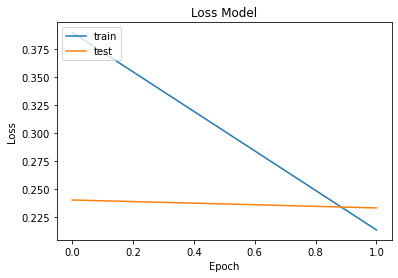

In [ ]:
# membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

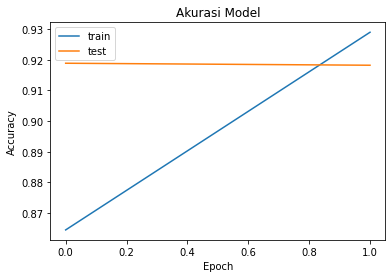

In [ ]:
# membuat plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()